IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
You are using an XGBoost version below 1.6.0 which is not fully supported by shap. Shap falls back to encoding the model as JSON which can lead to numerical precision issues. Please consider upgrading to XGBoost 1.6.0 or higher.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[[-1.2272346e-03  4.1259988e-03 -1.7119229e-03 ... -1.7124651e-02
  -2.9728184e-02  9.0281302e-03]
 [-9.3345903e-03 -9.1894250e-03 -2.2021723e-03 ... -2.2219636e-02
  -3.8158275e-02 -1.6991800e-04]
 [ 6.9921126e-04 -3.7939455e-03 -2.0447788e-03 ... -1.3930936e-02
  -4.1984823e-02  8.2612932e-03]
 ...
 [ 9.2154456e-04 -1.4623289e-02 -1.0906144e-03 ...  5.4079644e-02
   2.2227505e-02  1.0496646e-01]
 [-9.3376118e-05  6.9066398e-03 -1.8578538e-03 ... -1.4203938e-02
   1.1090542e-03  8.9607416e-03]
 [ 4.3962689e-05 -7.0841014e-03 -2.0414717e-03 ... -5.4693881e-02
  -5.7578664e-02 -9.7690903e-02]]
.values =
array([[-1.2272346e-03,  4.1259988e-03, -1.7119229e-03, ...,
        -1.7124651e-02, -2.9728184e-02,  9.0281302e-03],
       [-9.3345903e-03, -9.1894250e-03, -2.2021723e-03, ...,
        -2.2219636e-02, -3.8158275e-02, -1.6991800e-04],
       [ 6.9921126e-04, -3.7939455e-03, -2.0447788e-03, ...,
        -1.3930936e-02, -4.1984823e-02,  8.2612932e-03],
       ...,
       [ 9.2154456e-04, 

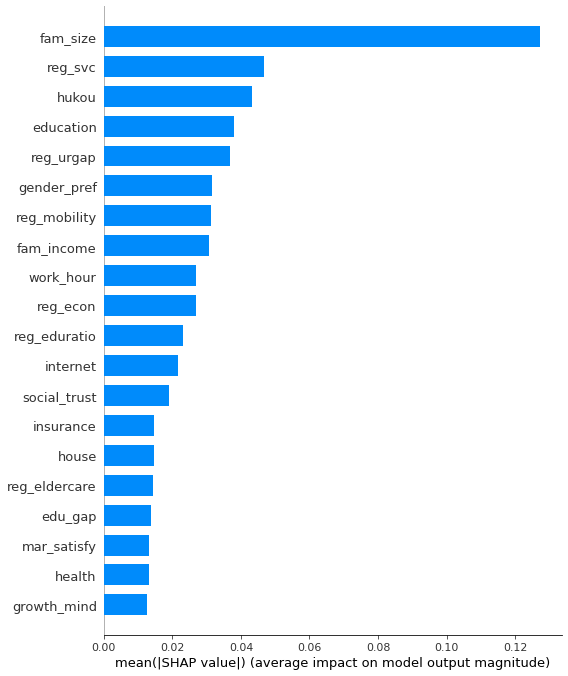

           feature  importance
0           gender    0.002141
1            urban    0.007366
2            party    0.003064
3         fam_size    0.127186
4            hukou    0.043361
5            ethno    0.002486
6        education    0.037923
7          age_gap    0.011901
8          edu_gap    0.013788
9      gender_pref    0.031656
10     mar_satisfy    0.013301
11            work    0.007181
12       work_hour    0.027022
13       insurance    0.014751
14   care_from_par    0.003987
15    fin_from_par    0.004223
16         fin_par    0.004150
17        care_par    0.001881
18        internet    0.021552
19    social_trust    0.018945
20   social_status    0.007845
21      fixed_mind    0.011825
22     growth_mind    0.012479
23        religion    0.001148
24     gover_evalu    0.008148
25   reg_eldercare    0.014387
26   reg_childcare    0.010693
27          health    0.013188
28    reg_medicare    0.006091
29           house    0.014512
30      fam_income    0.030601
31  fam_

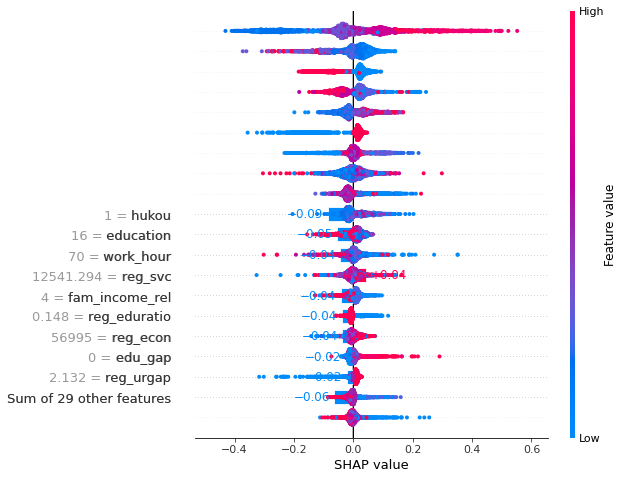

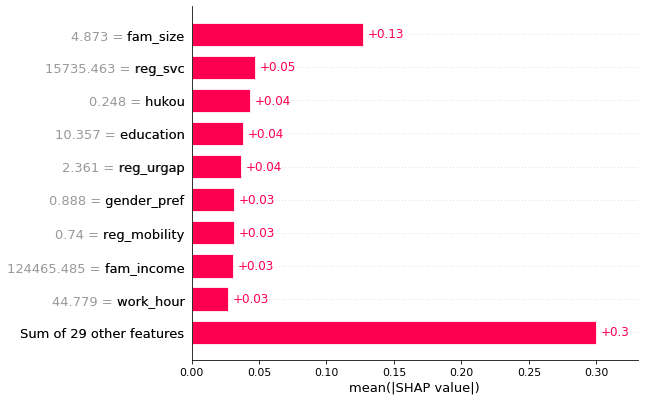

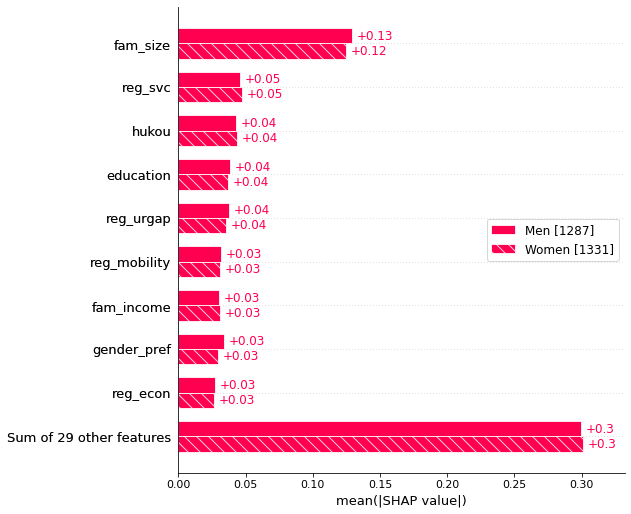

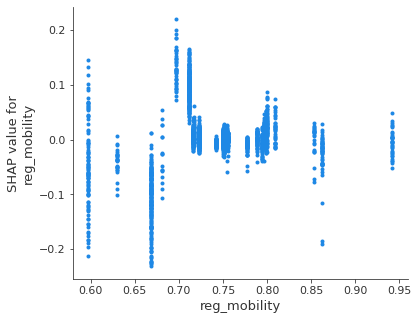

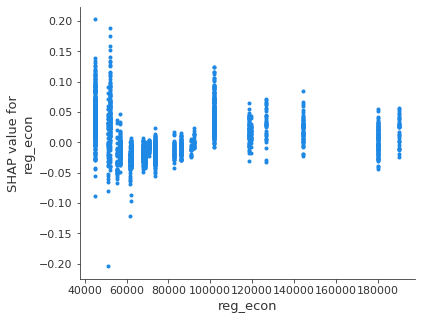

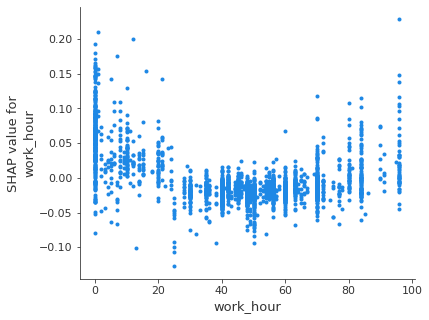

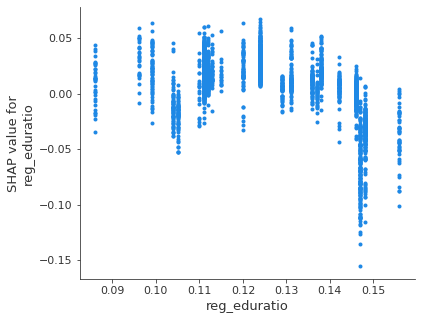

{'model_features': {'name': ['gender', 'urban', 'party', 'fam_size', 'hukou', 'ethno', 'education', 'age_gap', 'edu_gap', 'gender_pref', 'mar_satisfy', 'work', 'work_hour', 'insurance', 'care_from_par', 'fin_from_par', 'fin_par', 'care_par', 'internet', 'social_trust', 'social_status', 'fixed_mind', 'growth_mind', 'religion', 'gover_evalu', 'reg_eldercare', 'reg_childcare', 'health', 'reg_medicare', 'house', 'fam_income', 'fam_income_rel', 'area', 'reg_econ', 'reg_svc', 'reg_urgap', 'reg_eduratio', 'reg_mobility'], 'data': [0.004000000189989805, 0.012000000104308128, 0.010999999940395355, 0.07199999690055847, 0.07400000095367432, 0.019999999552965164, 0.02500000037252903, 0.01600000075995922, 0.020999999716877937, 0.03799999877810478, 0.024000000208616257, 0.017000000923871994, 0.01899999938905239, 0.02199999988079071, 0.01600000075995922, 0.02199999988079071, 0.02199999988079071, 0.014000000432133675, 0.02500000037252903, 0.023000000044703484, 0.01899999938905239, 0.017999999225139618

In [1]:
import numpy as np
import pandas
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
from spsspro.algorithm import supervised_learning
#生成案例数据
data = pandas.read_csv("0301 80s.CSV")
data_y = data.iloc[:, 0]
data_x = data.iloc[:, 1:]
#xgboost分类，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
result = supervised_learning.xgboost_regression(data_x=data_x, data_y=data_y)
# SHAP分析
explainer = shap.TreeExplainer(result['model'])
shap_values = explainer.shap_values(data_x)
shap_values2 = explainer(data_x)
print(shap_values)
print(shap_values2)
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="bar")
plt.show()
#数值展示
feature_importance = pandas.DataFrame()

feature_importance['feature'] = data_x.columns

feature_importance['importance'] = np.abs(shap_values).mean(0)

feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

# 可视化
shap.summary_plot(shap_values, data_x, feature_names=data_x.columns, plot_type="dot",show=False)
plt.savefig('shap_80s.png',dpi=600)
#局部以及全局图
shap.plots.bar(shap_values2[1], show_data=True)
shap.plots.bar(shap_values2, show_data=True)
#队列条形图
sex = ["Women" if shap_values2[i,"gender"].data == 0 
       else "Men" for i in range(shap_values2.shape[0])]
shap.plots.bar(shap_values2.cohorts(sex).abs.mean(0))
#依赖图
shap.dependence_plot('reg_mobility', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_econ', shap_values, data_x, interaction_index=None)
shap.dependence_plot('work_hour', shap_values, data_x, interaction_index=None)
shap.dependence_plot('reg_eduratio', shap_values, data_x, interaction_index=None)
print(result)